In [80]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [81]:
img = cv.imread('parrots.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

## Open CV example

In [82]:
blur = cv.GaussianBlur(img, (9,9), 1.0)

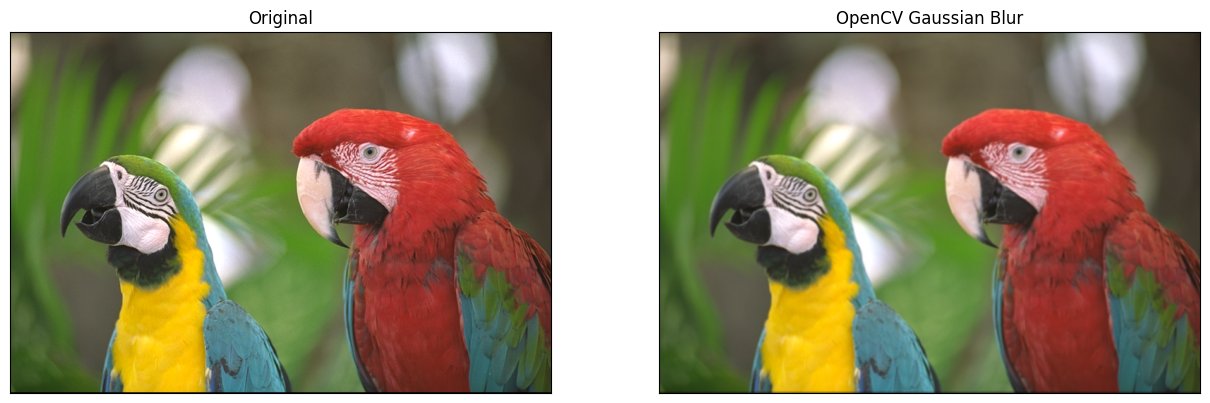

In [83]:
height, width = img.shape[:2]
dpi = 100

fig_width = width * 2 / dpi
fig_height = height / dpi

fig = plt.figure(figsize=(fig_width, fig_height), dpi=dpi)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('OpenCV Gaussian Blur')
plt.xticks([]), plt.yticks([])
plt.show()

## Gaussian kernel
$G(m,n)=\frac{1}{2\piσ^2}e^{-\frac{m^2+n^2}{2\sigma^2}}$


In [84]:
def gaussian_kernel_2d(size, sigma=1.0):
    if size % 2 == 0:
        raise ValueError("Размер ядра должен быть нечетным числом")

    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))

    kernel = kernel / (2 * np.pi * sigma**2)

    return kernel

## Gaussian filter
$y(i,j)=\sum_\limits{m=-ksize/2}^{ksize/2}{\sum_\limits{n=-ksize/2}^{ksize/2}{G(x,y)\cdot x(i-m, j-n)}}$

In [85]:
def gaussian_filter_custom(image, kernel_size=3, sigma=1.0):
    kernel = gaussian_kernel_2d(kernel_size, sigma)

    height, width, channels = image.shape
    filtered = np.zeros_like(image, dtype=np.float32)

    pad = kernel_size // 2
    padded = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='reflect')

    for i in range(height):
        for j in range(width):
            for c in range(channels):
                region = padded[i:i+kernel_size, j:j+kernel_size, c]
                filtered[i, j, c] = np.sum(region * kernel)

    return np.clip(filtered, 0, 255).astype(np.uint8)

## Native example

In [86]:
blur = gaussian_filter_custom(img, 9, 1.0)

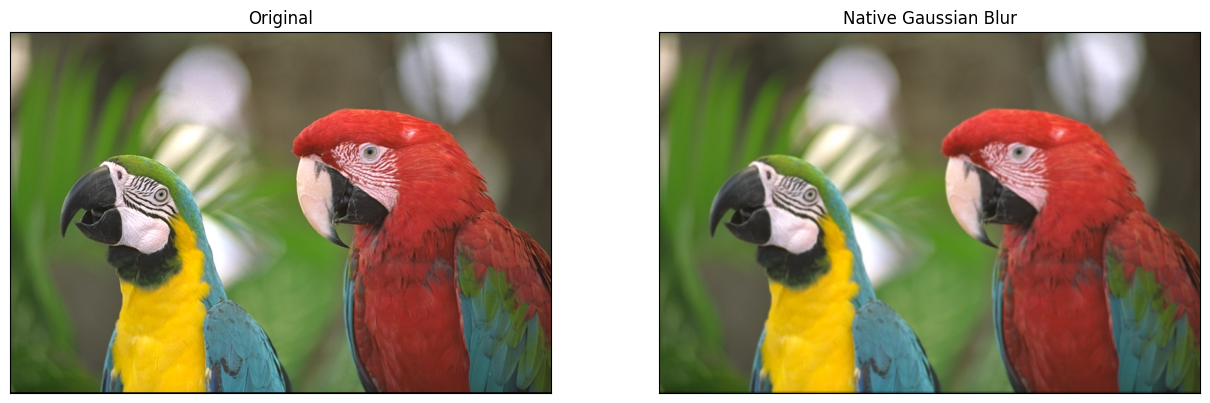

In [88]:
height, width = img.shape[:2]
dpi = 100

fig_width = width * 2 / dpi
fig_height = height / dpi

fig = plt.figure(figsize=(fig_width, fig_height), dpi=dpi)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Native Gaussian Blur')
plt.xticks([]), plt.yticks([])
plt.show()

## Compare with different kernel sizes and sigmas

In [89]:
kernel_sizes = [3, 5, 9, 15]
sigmas = [0.5, 1.0, 2.0, 4.0]

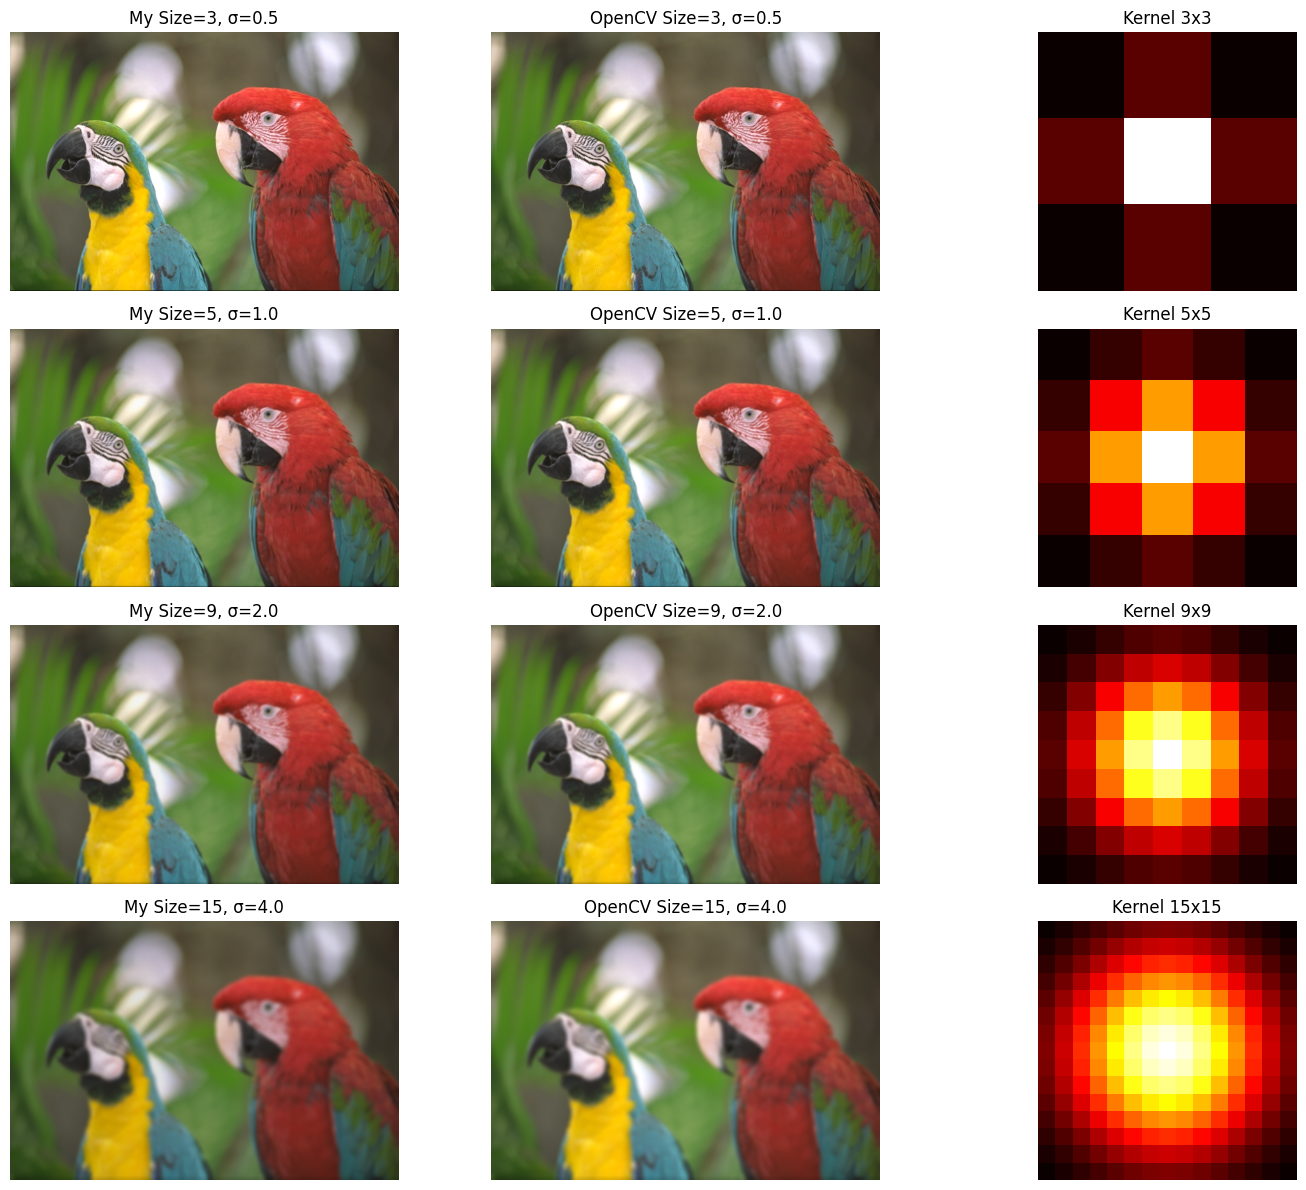

In [90]:
fig, axes = plt.subplots(len(kernel_sizes), 3, figsize=(15, 12))

for i, (kernel_size, sigma) in enumerate(zip(kernel_sizes, sigmas)):
    filtered = gaussian_filter_custom(img, kernel_size, sigma)
    cv_filtered = cv.GaussianBlur(img, (kernel_size, kernel_size), sigma)

    axes[i, 0].imshow(filtered)
    axes[i, 0].set_title(f'My Size={kernel_size}, σ={sigma}')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(cv_filtered)
    axes[i, 1].set_title(f'OpenCV Size={kernel_size}, σ={sigma}')
    axes[i, 1].axis('off')

    kernel = gaussian_kernel_2d(kernel_size, sigma)
    axes[i, 2].imshow(kernel, cmap='hot')
    axes[i, 2].set_title(f'Kernel {kernel_size}x{kernel_size}')
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

## Сomparing the running time of algorithms

In [91]:
import time

In [92]:
native_times = []
cv_times = []

for i, kernel_size in enumerate(kernel_sizes):
    nts = 0
    for _ in range(10):
      start = time.time()
      filtered = gaussian_filter_custom(img, kernel_size, sigma)
      nts += (time.time() - start) * 1000
    native_times.append(nts/10)

    cvts = 0
    for _ in range(10):
      cv_start = time.time()
      cv_filtered = cv.GaussianBlur(img, (kernel_size, kernel_size), sigma)
      cvts += (time.time() - cv_start) * 1000
    cv_times.append(cvts/10)

In [93]:
import pandas as pd
df = pd.DataFrame()
df['kernel_size'] = kernel_sizes
df['native_time_ms'] = native_times
df['openCv_time_ms'] = cv_times
df

,kernel_size,native_time_ms,openCv_time_ms
0,3,6131.192613,0.489330
1,5,6140.930462,0.684690
2,9,6309.488511,1.402688
3,15,6838.410687,2.283812
